### Multiclass Classification

This notebook handles the same problem as ml_mnist_0 but with a multiclass approach

In [13]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split


mnist_data = load_digits()

print(mnist_data.keys())

X = mnist_data['data']
y = mnist_data['target']

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


#### Inspecting stuff 😁🙂😁😎

[[ 0.  0.  0.  4. 11. 15. 15.  2.]
 [ 0.  1. 10. 16. 13. 14. 14.  2.]
 [ 0.  5. 16. 16. 16. 16. 14.  0.]
 [ 0.  0.  9.  8.  8. 15.  9.  0.]
 [ 0.  0.  0.  0.  1. 16.  2.  0.]
 [ 0.  0.  0.  0. 10. 10.  0.  0.]
 [ 0.  0.  0.  1. 16.  6.  0.  0.]
 [ 0.  0.  0.  3. 16.  2.  0.  0.]]


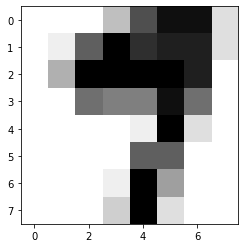

Actual Value: 9


In [48]:
# plotting a randome instance in the X
import random
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

rand_int = random.randint(0, len(X))
rand_digit = X[rand_int]
rand_digit_image = rand_digit.reshape(8, 8)

print(rand_digit_image)

plt.imshow(rand_digit_image, cmap=matplotlib.cm.binary)
plt.show()

print(f"Actual Value: {y[rand_int]}")

In [8]:
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


#### Splitting data

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

#### Training model

Some algorithms (such as Random Forest classifiers or naive Bayes classifiers) are capable of handling multiple classes directly. Others (such as Support Vector Machine classifiers or Linear classifiers) are strictly binary classifiers.

However, there are various strategies that you can use to perform multiclass classification using multiple binary classifiers.

For example, one way to create a system that can classify the digit images into 10 classes (from 0 to 9) is to train 10 binary classifiers, one for each digit (a 0-detector, a 1-detector, a 2-detector, and so on). Then when you want to classify an image, you get the decision score from each classifier for that image and you select the class whose classifier outputs the highest score. 

This is called the **one-versus-all** (OvA) strategy (also called **one-versus-the-rest**).

Scikit-Learn detects when you try to use a binary classification algorithm for a multiclass classification task, and it automatically runs OvA. Like the example below 👇

In [49]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(random_state=42)       # SGDClassifier is a strict binary classifier

sgd.fit(X_train, y_train)       # sklearn automatically detects we are trying to use a binary classifier for a multiclass classification task and it automatically runs One-versus-All 

# test trained model on the rand_digit_imagabse
sgd.predict([rand_digit])

array([9])

If you want to force ScikitLearn to use one-versus-one or one-versus-all, you can use the OneVsOneClassifier or  OneVsRestClassifier classes. Simply create an instance and pass a binary classifier to its constructor. For example, this code creates a multiclass classifier using the OvO strategy, based on a SGDClassifier:

In [54]:
from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([rand_digit])

array([9])

In [55]:
len(ovo_clf.estimators_)

45

#### Inspecting Trained model

Under the hood, Scikit-Learn actually trained 10 binary classifiers, got their decision scores for the image, and selected the class with the highest score.

To see that this is indeed the case, you can call the decision_function() method. Instead of returning just one score per instance, it now returns 10 scores, one per
class:

In [50]:
rand_digit_scores = sgd.decision_function([rand_digit])
rand_digit_scores

array([[-2969.93783478,  -314.02250385, -6158.04451764, -3664.89489324,
        -2112.21428627, -2222.41882475, -7610.79402736, -3158.28727142,
         -622.24352301,  1306.6080932 ]])

In [51]:
# to select the indices of the max element of the array (rand_digit_scores)
import numpy as np
np.argmax(rand_digit_scores)

9

When a classifier is trained, it stores the list of target classes in its classes_ attribute, ordered by value.

In [52]:
#
sgd.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Evaluating Trained model

#### Accuracy

In [58]:
sgd.score(X_train, y_train)

0.9768089053803339

#### Cross-validation

In [61]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(sgd, X_train, y_train, cv=3)
scores

array([0.94166667, 0.9275766 , 0.94150418])

#### Scaling the training data
Let's see the effect of scaling data on the performance of the model:

In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

scores = cross_val_score(sgd, X_train_scaled, y_train, cv=3)
scores

array([0.90555556, 0.94707521, 0.9275766 ])

    😐😞🙂😲 Not much of a difference, we can conclude that scaling our features has no significant effect on performance.

### Error Analysis

Of course, if this were a real project, you would follow the steps in your Machine Learning project checklist (see Appendix B): exploring data preparation options, trying out multiple models, shortlisting the best ones and fine-tuning their hyperparameters using GridSearchCV, and automating as much as possible, as you did in the previous chapter. 

Here, we will assume that you have found a **promising model** and you want to find ways to improve it. One way to do this is to analyze the **types of errors** it makes.

First, you can look at the confusion matrix. You need to make predictions using the
cross_val_predict() function, then call the confusion_matrix() function, just like
you did earlier:

In [65]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd, X_train, y_train, cv=3)

conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[108,   0,   0,   0,   1,   1,   1,   0,   0,   0],
       [  0, 100,   0,   1,   1,   0,   2,   0,   2,   4],
       [  0,   0, 110,   0,   0,   0,   0,   1,   0,   0],
       [  0,   0,   1, 102,   0,   2,   0,   2,   2,   3],
       [  0,   2,   0,   0,  99,   0,   0,   1,   1,   0],
       [  1,   0,   0,   0,   0,  93,   1,   0,   0,   4],
       [  0,   0,   0,   0,   1,   0, 110,   0,   1,   0],
       [  0,   0,   0,   0,   4,   0,   0, 101,   1,   2],
       [  0,   9,   1,   2,   1,   1,   3,   0,  91,   1],
       [  0,   1,   0,   0,   1,   1,   0,   2,   2,  96]], dtype=int64)

That’s a lot of numbers. It’s often more convenient to look at an image representation of the confusion matrix, using Matplotlib’s matshow() function:

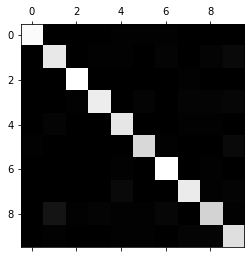

In [71]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()